# Basit Doğrusal Regresyon

## Modelleme 

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()
#aşağıda index değerlerini de değişken olarak almış bunu önlemek için "Advertising.csv", usecols = [1,2,3,4] yazdık ya da aşağıdaki gibi iloc kodunu yazdık.
#use colstan sonra gelen 1,2,3,4 değerleri değişkenlerin sayısını ifade ediyor.

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
#df = df.iloc[:,1:len(df)]
#bütün gözlemleri seç,1'den(indexi ignore ederek yani, df in uzunluğunca sona kadar git)

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
df.isnull().values.any()
#eksik değer var mı diye sorguladık.

False

In [10]:
df.corr()
# dağılım ve korelasyonuna bakıyoruz. şağıdaki tabloda görüldüğü üzere sales ile en çok ilişkisi olan TV yani TV reklamları satışı arttırmış.
#radyo ile tv arasındaki korelasyon düşük. Yani değerlendirilirken tv ile radyo beraber alınabilir. Radyod a satışlarda etkili çünkü.

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


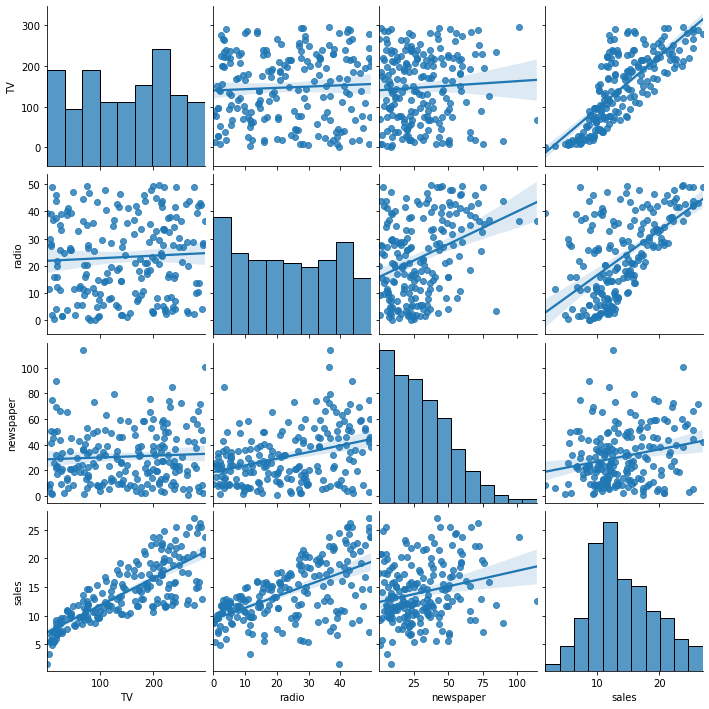

In [11]:
import seaborn as sns
sns.pairplot(df, kind ="reg");

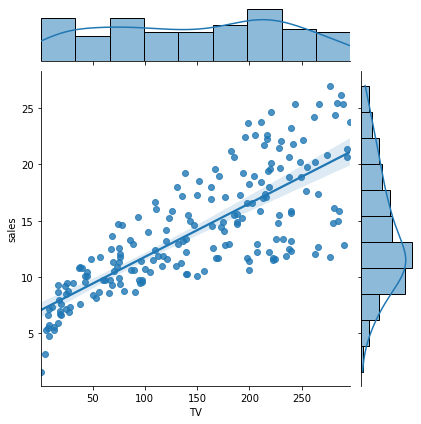

In [12]:
sns.jointplot(x = "TV", y= "sales", data = df, kind = "reg");

# Statsmodels ile Modelleme

In [13]:
import statsmodels.api as sm

In [14]:
X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [15]:
X = sm.add_constant(X)
#tek değişkenden oluştuğu için matrix işlemlerinin yapılabilmesi için sabit 1 değişkenini ekledik

In [16]:
X[0:5]
#BAĞIMSIZ DEĞİŞKEN

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [17]:
y = df["sales"]
#BAĞIMLI DEĞİŞKEN

In [18]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [19]:
lm = sm.OLS(y,X)
#model kurma işlemi

In [20]:
model = lm.fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 25 Feb 2021   Prob (F-statistic):           1.47e-42
Time:                        13:19:20   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Yukarıda Sckilearn daha kullanışlı olsa da bunun için geliştirilmiş Statsmodel kütüphanesi kadar detaylı bilgi veremeyecektir. Detaylı incelenmek istendiğinde yukardaki gibi  değişkenleri atama fit etme işleminden sonra oluşturulan modelin incelemesi yapılabilir. Aşağıda ise yorumlama esnasında kullanılacak önemli açıklamalar yer almaktadır.**
### **R-squared :** Bağımsız değişkenin bağımlı değişkendeki değişkenliği açıklama başarısı. 0.612 değeri TV değişkeninin satış değişkenindeki değişkenliğin yüzde atmışını açıkladığı anlamına gelir.
### **Adj. R-squared :** Düzeltilmiş r kare değeri başka incelemelrde birdenf azla değişken eklendiğinde artacak ve bizi yanıltacak oln R-squared değerine göre daha duyarlılığı az olan bize daha net değişme oranını verecek dparametredir.
### **F-statistic :** Modelin anlamlılığını belirten parametredir.
### **Prob (F-statistic):**	p-value ifadesinin kendisidir.
### const-coef : hiç bir değişkenin etkisi olmadığında beklenen ortalama satış miktarını ifade eder. formüldeki b0 değeri. P>|t| değeri ise anlamlı olduğunu ifade ediyor. . sonrasında gelen 0.025-0.975 ise güven aralığını %95 ihtimalle hangiaralıkta olacağını ifade etmektedir.
### TV-coef : TV harcama birimi bir arttığında satışlardaki oluşacak artışı ifade etmektedir. formüldeki b1 değeri. P>|t| ve sonrası bu değişken için de aynıdır.

In [22]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 25 Feb 2021   Prob (F-statistic):           1.47e-42
Time:                        13:19:20   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model.params
#hızlı bir şekilde parametreleri katsayıları görmek için b0 ve b1 değerleri.

Intercept    7.032594
TV           0.047537
dtype: float64

In [24]:
model.summary().tables[1]
#katsayı detaylarına erişmek için. Aşağıdaki 3 satırda yukardaki tablonun hangi indexinde hangi verilerin saklandığını görüyoruz.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [25]:
model.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.612
Model:,OLS,Adj. R-squared:,0.610
Method:,Least Squares,F-statistic:,312.1
Date:,"Thu, 25 Feb 2021",Prob (F-statistic):,1.47e-42
Time:,13:19:20,Log-Likelihood:,-519.05
No. Observations:,200,AIC:,1042.
Df Residuals:,198,BIC:,1049.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [26]:
model.summary().tables[2]

Omnibus:,0.531,Durbin-Watson:,1.935
Prob(Omnibus):,0.767,Jarque-Bera (JB):,0.669
Skew:,-0.089,Prob(JB):,0.716
Kurtosis:,2.779,Cond. No.,338.


In [27]:
model.conf_int()
#katsayıların güven aralıklarına erişmek için.

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [28]:
model.f_pvalue
#modelin anlamlılığına ilişkin istatistiğe erişmek için

1.4673897001947095e-42

In [29]:
print("f_pvalue : ", "%.3f" % model.f_pvalue)
#yukardaki e değerinden kurtulmak için

f_pvalue :  0.000


In [30]:
print("fvalue : ", "%.2f" % model.fvalue)
#f-Statistic'e erişmek için

fvalue :  312.14


In [31]:
print("tvalue : ", "%.2f" % model.tvalues[0:1])


tvalue :  15.36


In [32]:
model.mse_model
#hata kareler ortalaması(modelin başarısıyla ilgili ilk istatistik) ortalaması 14 olan bir değişken için birim başına yaspılacak hata olarak aşağıdaki değer çok yüksek.Bu yüzden aşağıdaki kodu yazıyoruz.

3314.6181668686486

In [33]:
model.rsquared
#açıklanabili bir değer olarak bu değer alınabilir.

0.611875050850071

In [34]:
model.rsquared_adj
#düzeltilmiş r kare değeri

0.6099148238341623

In [35]:
model.fittedvalues[0:5]
#tahmin edilen değerler

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [36]:
y[0:5]
#gerçek değerler

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [37]:
#modelin parametrik olarak yazılması
print("Sales = " + str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

Sales = 7.03 + TV*0.05


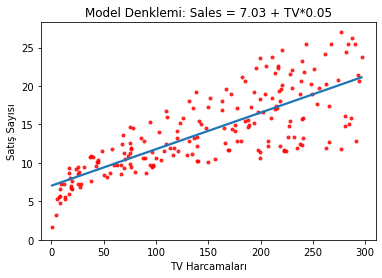

In [38]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);
#yukardaki matematiksel işlemi görselleştirmek istersek

### Scikitlearn kullanarak model kurmak isitersek


In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
X = df[["TV"]]
y = df[["sales"]]
reg = LinearRegression()
#obecjt oriented programming kapsamında örnekleme oluşturuyoruz. sonrasında model kurma işlemini gerçekleştiriyoruz.
model = reg.fit(X,y)
model.intercept_
#b0 değeri(yani y eksenini kestiği nokta)

array([7.03259355])

In [41]:
model.coef_
#b1 değeri

array([[0.04753664]])

In [42]:
model.score(X,y)
#r kare değeri

0.611875050850071

In [43]:
model.predict(X)[0:10]
# otahmin edilen değerlere erişmek için

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

## Tahmin

Model denklemi:

Sales = 7.03 + TV*0.04

Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [44]:
7.03 + 30*0.04

8.23

In [45]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)

In [46]:
model.predict([[30]])

array([8.45869276])

In [47]:
yeni_veri = [[5],[90],[200]]

In [48]:
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

## Artıklar ve Makine Öğrenmesindeki Önemi

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [51]:
mse = mean_squared_error(y, model.fittedvalues)

In [52]:
mse

10.512652915656757

In [53]:
import numpy as np
rmse = np.sqrt(mse)

In [54]:
rmse

3.2423221486546887

In [55]:
reg.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [56]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [57]:
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": reg.predict(X)[0:10]})

In [58]:
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [59]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]

In [60]:
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [61]:
k_t["hata_kare"] = k_t["hata"]**2

In [62]:
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [63]:
np.sum(k_t["hata_kare"])

92.90350329638103

In [64]:
np.mean(k_t["hata_kare"])

9.290350329638105

In [65]:
np.sqrt(np.mean(k_t["hata_kare"]))

3.048007599996776

In [66]:
model.resid[0:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

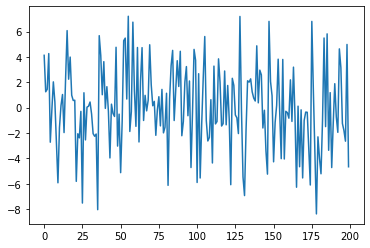

In [67]:
plt.plot(model.resid);

# Çoklu Doğrusal Regresyon¶


In [68]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [69]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [70]:
X = df.drop("sales", axis = 1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)


In [71]:
X_train.shape

(160, 3)

In [72]:
y_train.shape

(160,)

In [73]:
X_test.shape

(40, 3)

In [74]:
y_test.shape

(40,)

In [75]:
training = df.copy()

In [76]:
training.shape

(200, 4)

## Statsmodels

In [77]:
lm = sm.OLS(y_train, X_train)

In [78]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Thu, 25 Feb 2021   Prob (F-statistic):                   1.28e-137
Time:                        13:19:22   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


## scikit-learn model

In [80]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [81]:
model.intercept_

2.979067338122629

In [82]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

## Tahmin

Model denklemi:

Sales = 2.97 + TV0.04 + radio0.18 + newspaper*0.002

Örneğin 30 birim TV harcaması, 10 birim radio harcamasi, 40 birimde gazete harcaması olduğunda satışların tahmini değeri ne olur?



In [83]:
yeni_veri = [[30], [10],[40]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [84]:
model.predict(yeni_veri)

array([6.32334798])

In [85]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [86]:
rmse

1.644727765644337

In [87]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [88]:
rmse

1.7815996615334502

## Model Tuning / Model Doğrulama

In [89]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### Aşağıda random_state veriden train için alıncak gözlemlerin sayısını ve sırasını belirliyor. O sayıyı değiştirdiğimizde hemen altındaki predict değerleri de değişiyor.Bunu önlemek için cross validation işlemi yapılır.

In [90]:
X = df.drop('sales', axis=1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=144)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [91]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
# eğitim için hesaplanmış hata oranı. Veri için bulduğumuz rmse değeri. Aşağıda ise farklı 10 değer bulunuyor bunun için.

1.6748559274650712

In [92]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
#test için hazırlanmış hata oranı

1.6640263686701036

In [93]:
model.score(X_train, y_train)

0.8971614078663419

#### **Aşağıda ise cross validation işlemi yapılıyor. model argümanını x bağımsız ve y bağımlı değişkenini girdik. 10 katlı cross validation ve scoring olarak da r2 girdik. Çıkan değerler 10 farklı cross'da gelen değerler. Bunların ortalamasını aldığımızda ise bize daha sağlıklı genel geçer bir değer vermiş olacak.**

In [94]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

0.8733783298422942

In [95]:
-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")
# eğitim için 10 adet farklı eğitim hatası oluşturuldu. rmse değerleri. Negatif olduğu için de crossun başına - ifadesini koyduk.

array([3.77011117, 1.38904597, 1.31506551, 3.32109589, 8.82506973,
       2.37926645, 2.2872061 , 1.05714426, 2.99532621, 3.15248307])

In [96]:
np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()
# eğitim için hesaplanmış hataların(10) ortalaması

1.6649345607872927

In [97]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()
#test için hesaplanmış hataların(10) ortalaması

1.7399924960346644

# PCR Model

In [98]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [101]:
dms = pd.get_dummies(df[["League", "Division", "NewLeague" ]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


#### Yukarda görüldüğü üzere dummy değişken tuzağına düşülmüş durumda. 1 gözlem  birden fazla değişkenle ifade ediliyor. Bunları silmemiz lazım.

In [102]:
y = df["Salary"]

In [103]:
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")

In [104]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [105]:
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)

In [106]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

print("X_train", X_train.shape)
print("y_train", X_train.shape)
print("X_test", X_test.shape)
print("y_test", X_test.shape)

trainin= df.copy()

print("training", trainin.shape)

X_train (197, 19)
y_train (197, 19)
X_test (66, 19)
y_test (66, 19)
training (263, 20)


In [108]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#R'da olduğu gibi otomatik kendi PCA yapmıyor bunu kendimiz uygulamamız gerekiyor. Yukarda kütüphaneyi çağırdık.

In [109]:
pca = PCA()
#verinin ölçeklendirilmesi ve bileşenlerin oluşturulması 

In [110]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [111]:
X_reduced_train[0:1,:]
#1.gözelm ve tüm bileşenleri gözlemliyoruz

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [112]:
X_reduced_train[0:1,0:1]
#1. bileşen üzerinde 1.gözlem

array([[-2.49569913]])

In [113]:
X_reduced_train[0:1,:2]
#2. bileşen üzerinde 1.gözlem

array([[-2.49569913, -0.3377624 ]])

In [114]:
X_reduced_train[0:1,:]
# 1. gözlem üzerinde bütün bileşenleri görmek için

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [115]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:10]

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28])

### Yukardakirakamlar 1. gözlemdeki 1. değişkenin tek başına değişme miktarını(varyansı) %38.18 ini açıkladığını, 2. bileşenin 1. bileşenle %59.88' ini açıkladığını ve bu şekilde kümülatif olarak 10. gözlemde değişimin 97.28'ini açıkladığını gösteriyor. PCA'nın amacı zaten daha az değişkenle ifade edebilmekti.

In [116]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]
#biz bu değişkenleri 19 değişkenden 5 değişkene indirererk %84.18'lik bir başarı elde ediyoruz

array([38.18, 59.88, 70.88, 78.88, 84.18])

In [117]:
lm = LinearRegression()

In [118]:
pcr_model = lm.fit(X_reduced_train, y_train)
#indirgenmiş veri seti üzerinde doğrusal regresyon fit ettik ve aşağıdaki katsayıları elde ettik

In [119]:
pcr_model.intercept_

543.4834416243655

In [120]:
pcr_model.coef_
#19tane katsayı gelmiş oldu

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

## Tahmin

In [121]:
y_pred = pcr_model.predict(X_reduced_train)

In [122]:
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [123]:
np.sqrt(mean_squared_error(y_train, y_pred))

289.3292825564976

In [124]:
df["Salary"].mean()

535.9258821292775

In [125]:
r2_score(y_train, y_pred)

0.5770075250410179

In [126]:
pca2 = PCA()

In [127]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [128]:
y_pred = pcr_model.predict(X_reduced_test)

In [129]:
np.sqrt(mean_squared_error(y_test, y_pred))

405.15753641499646

## Model Tuning

In [130]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)
y_pred = pcr_model.predict(X_reduced_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

405.15753641499646


In [131]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
#modelleme için 1. bileşeni aldı
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
#test setini aynı ayara getirmek için burda da 1 bileşen aldık
print(np.sqrt(mean_squared_error(y_test, y_pred)))

390.79142556822234


In [132]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:2], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:2])
print(np.sqrt(mean_squared_error(y_test, y_pred)))
#2 bileşen için yaptık

396.38761247967653


In [133]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

390.79142556822234


### **Farklı değerler seçildiğinde verilen hatalar da farklı değerler oluyor. Bunu gidermek için en az hatayı bulmak adına tektek deneyerek değil cross validation yaparak elde edeceğiz. Olası bileşen sayısı değerlerini array olarak vektör olarak gönderip bunların denenip en gzüel sonucun gelmesi sonucunda optimum bileşen sayısını belirleme içlemi yapacağız. Bunun için modelselection kütüphanesini çağırıyoruz.**

In [134]:
from sklearn import model_selection

In [135]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

# 10 katlı cross validation yapısı kurduk, ayrılmadan önce verilerin karıştırılması daha objectif olması için shuffle true yaptık

In [136]:
lm = LinearRegression()

In [137]:
RMSE = []
#hata kareler ortalamasının kare kökü

In [138]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)


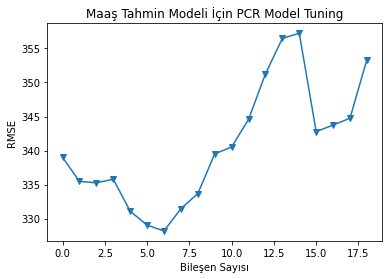

In [139]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

### Yukaradki grafikte optimum hata değerini 6. değer olarak bulduk. Bunu kullanarak optimum modelden yola çıkarak final modelini oluşturmamız gerekiyor.

In [140]:
lm = LinearRegression()

In [141]:
pcr_model = lm.fit(X_reduced_train[:, 0:6], y_train)
#pcr modelimizi kurduk

In [142]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [143]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))
#tahmin edilen değerler ile train içindeki gerçek değerler için eğitim hatamıza bakıyoruz.Aşağıda da test seti için gerçekleştiriyoruz bu sefer.

308.8265983094501


In [144]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [145]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

393.1198700096223


### Normalde tune edildikten sonra hata değerinin daha düşük çıkmasını bekleriz. Ancak burda tam tersi bir durum ortaya çıktı. Ancak valide edilmiş değerler ile tune işlemi yaptığımızda bu durumlar da oluşabilir.

In [146]:
import pandas as pd 
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [147]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [148]:
pls_model = PLSRegression().fit(X_train, y_train)
#modeli oluşturduktan sonra aşağıda bileşen sayılarını değiştirdik. Ancak gelen değişken katsayılarının sayısı yine aynı geld. Bunun nedenle bu gelen değişkenlerin katsayılarını doğrusal regresyon işlemine tabi tuttuktan sonra components bileşenlerinin katsayısına ulaşacağız.

In [149]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

In [150]:
pls_model = PLSRegression(n_components = 6).fit(X_train, y_train)

In [151]:
pls_model.coef_

array([[-108.74143193],
       [ 197.6386967 ],
       [  22.57338481],
       [  26.52768741],
       [ -25.67952167],
       [  54.16363009],
       [ -25.89997437],
       [   5.36637756],
       [  89.44665343],
       [  26.79039104],
       [ 102.43239418],
       [  68.82932424],
       [ -61.11470635],
       [  94.44121847],
       [  26.38215013],
       [ -45.01850138],
       [  77.17773908],
       [ -35.85447586],
       [ -45.66863853]])

In [152]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [153]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

## Tahmin

In [154]:
X_train.head()
# aşağıdaki bütün değişkenleri alıp yukardaki katsayı değerleriyle işleme tabi tutup train değerlerini bize verecek

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


In [155]:
pls_model.predict(X_train)[0:10]
#tahmin değerleri

array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077],
       [987.49530026],
       [120.63097106],
       [289.9263406 ],
       [663.41886918],
       [817.90486641]])

In [156]:
#train değerleri ve test hatalarını cross validation'a girmeden bakacağız

In [157]:
y_pred = pls_model.predict(X_train)

In [158]:
np.sqrt(mean_squared_error(y_train,y_pred))
#train hatamız

310.1167593109696

In [159]:
r2_score(y_train,y_pred)

0.5140424486535482

In [160]:
y_pred = pls_model.predict(X_test)
#modelimizi eğitim seti üzerinden kurduk. model nesnemizi kullanarak tahmin yapıyoruz. Xtest içerisindeki var olan bağımsız değişkenleri alacak bu modelleri hesaplanan kat sayıların yerine koyacak ve  Her bir gözlemlem değeri için y tahmin değeri oluşturacak.

In [161]:
np.sqrt(mean_squared_error(y_test,y_pred))
#beklenildiği üzere test hatası train hatasından yüksek çıktı.

398.09956327448526

## Model Tuning

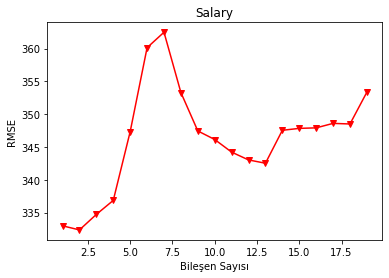

In [162]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [163]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)
#iki bileşenli yeni final modelimizii kurduk

In [164]:
y_pred = pls_model.predict(X_test)
#yeni inal modeli için test hatası hesaplama işlemi. PLS model ile

In [165]:
np.sqrt(mean_squared_error(y_test, y_pred))
#hata karaler ortalamasının karekökü

398.09956327448526

#### Yukardaki modelde görüldüğü üzere en  ideal düşük hatayı 2 değişkene indirildiğinde vermektedir.
#### Önce train ile eğittik sonra test ettik ve en ideal bileşen sayısının 2 oldupunu bulduk. Yeniden ideal değere göre modelimizi kurduk ve test hatamızı hesapladık.

# Ridge Regresyon

## Model

In [166]:
import pandas as pd 
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [167]:
from sklearn.linear_model import Ridge

In [168]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [170]:
ridge_model
#alpha=lambda

Ridge(alpha=0.1)

In [171]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [172]:
10**np.linspace(10,-2,100)*0.5 
#çeşitli lambda değerlerini deneyim lambdalara göre katsayıların nasıl değiştiğini gözlemleme çalışacağız. Ceza şiddetini ayarlayan şey lambda olduğu için gözlemlememiz gerekiyor.

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

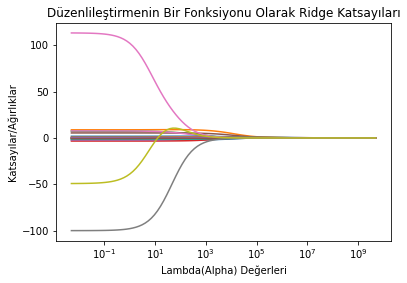

In [173]:
#lambdaları oluşturduk
lambdalar = 10**np.linspace(10,-2,100)*0.5 

#ridge modelimizi oluşturduk ve katsayıların kaydedilmesi için katsayılar isimli boş bir dizi oluşturduk.
ridge_model = Ridge()
katsayilar = []


3
for i in lambdalar:
    #her iterasyonda alpha değerlerini değiştirecek. set params ile parametre set edecek. OOP anlamında nesnenin içine parametreleri gönderdik.
    ridge_model.set_params(alpha = i)
    #X_train ve y_train ile bir önceki modelde verilen parametreler ile fit edilecek.
    ridge_model.fit(X_train, y_train) 
    #katsayılar arrayine elde edilen aktsayıları kaydetti
    katsayilar.append(ridge_model.coef_) 
    #her itereasyonda 19 katsayı gelecek.

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') #x ekseninde görselleştirme için logaritmik dönüşüm yaptık. Diğer türlü düzgün ögrünmeyecekti.

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

#### Her farklı renkteki çizgi verilen lambda aralıklarına göre katsayıların değişimini (parametreyi) gösteriyor. Amaç 0 yapmadan 0'a yaklaştırıp değişkenleri silmeden etkilerini azaltmak.

In [175]:
y_pred = ridge_model.predict(X_test)
#yukarda alpha=0.1 oalrak verilmişti. Buna göre biz bir test hatası hesapladık. R2 değerine bakmadık!

In [176]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.05179222828434

### Model Tuning

#### Yukarda sadece lambda değerlerini gördük. Tuning kısmında ise hangisinin daha iyi olduğunu bulacağız. Sonrasında da ona göre bir final modeli oluşturacağız.

In [178]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

In [179]:
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [186]:
from sklearn.linear_model import RidgeCV

In [190]:
ridge_cv = RidgeCV(alphas = lambdalar,
                   scoring = "neg_mean_squared_error",
                   normalize = True)

#yukardaki kodda model oluşturduk sonrasında aşağıda fit fit ettik.

In [191]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [192]:
ridge_cv.alpha_



0.7599555414764666

#### Yukardaki RidgeCV kütüphanesindeki modeül ile ideal lambda değerini bulduk. lambda = 0.7599555414764666
#### Aşağıda ise tune ederek final modelini oluşturuyoruz. sonunda .fit(X_train,y_train ekleyerek daha kısa şekilde fitliyoruz.

In [194]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_,
                   normalize = True).fit(X_train,y_train)

In [195]:
#test hatasını gözlemlemek için
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))
#y_pred = ridge_model.predict(X_test) üst satırda yazan kodun geldiği yer. Ayrı basamakta kaydedip yazmak yerine böyle yazmak daha kısa.

386.6826429756415

# Lasso Regresyon

## Model

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [197]:
from sklearn.linear_model import Lasso

In [199]:
lasso_model = Lasso(alpha = 0.1).fit(X_train,y_train)

In [200]:
lasso_model

Lasso(alpha=0.1)

In [202]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

Text(0, 0.5, 'weights')

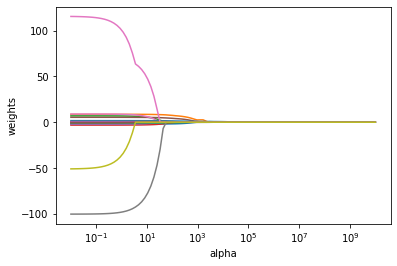

In [205]:
lasso = Lasso()
#lambda kümesi oluşturduk
lambdalar = 10**np.linspace(10,-2,100)*0.5
#boş katsayılar listesi oluşturuyoruz
katsayilar = []


for i in lambdalar:
    #lamdalar içinde alpha değerleri i için değişecek sonrasında lasso ile xtrain ytrain değerlerine bakacağız
    lasso.set_params(alpha=i)
    #modeli fit ettik
    lasso.fit(X_train,y_train)
    #katsayılar listesine lassodan gelen değişken katsayısı kadar coefficentler (katsayılar) kayıt edildi
    katsayilar.append(lasso.coef_)
    
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights")

### Çeşitli alpha değerlerine karşı alcakları değerler ifade edildi. Belirli bir noktadan sonra düz bir çizgi oluşturuldu. Ridgeden farkı bu çizginin bu sefer 0'a  indirgendiğini bilmemiz.

## Tahmin

In [206]:
lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [207]:
y_pred = lasso_model.predict(X_test)

In [210]:
#test hatası 
np.sqrt(mean_squared_error(y_test, y_pred))

356.7545270148768

### Model Tuning

In [ ]:
#### Lambda değerlerine ayrıyetten bir aralık belirlemedik ya da biz oluşturmadık. Modelin kendisindeki yüklü olan lambda aralıklarını otomatik olarak kullandık. Arada yapılabilir.

In [211]:
from sklearn.linear_model import LassoCV

In [215]:
lasso_cv_model = LassoCV(alphas = None,
                         cv= 10,
                         max_iter = 100 ,
                         normalize = True)

In [217]:
lasso_cv_model.fit(X_train, y_train)
#model kuruldu

LassoCV(cv=10, max_iter=100, normalize=True)

In [218]:
lasso_cv_model.alpha_

0.39406126432470073

In [224]:
# final modelini oluşturuyoruz.
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [221]:
lasso_tuned.fit(X_train, y_train)
#model fit ettik

Lasso(alpha=0.39406126432470073)

In [222]:
y_pred = lasso_tuned.predict(X_test)

In [223]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.5226376958367

#### Yukarda Ridgedeki hata 386.682 idi bu yöntemle daha daz hatalı bir test hatası elde ettik.

# ElasticNet Regresyonu

In [246]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)




In [247]:
from sklearn.linear_model import ElasticNet

In [248]:
enet_model = ElasticNet().fit(X_train, y_train)

In [249]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [250]:
enet_model.intercept_

-6.465955602112217

## Tahmin

In [251]:
enet_model

ElasticNet()

In [252]:
enet_model.predict(X_test)

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123,  702.9157117 ,  931.50283407,
        184.87939803,  385.14973787,  325.38944176,  546.99346574,
        774.28001821,  101.83114992, 1250.86758812,  370.67651244,
        442.05734523,  781.17288513,  578.63736538,  609.31927808,
        608.31719597,  227.46556223,  921.85505228,  301.1202457 ,
        386.31721051,  133.61143326,  162.28505608,   88.29793182,
        359.9068418 ,  422.51268445,  265.8663769 ,  355.70450908,
       1329.36312363,  125.05506935,   82.74580002,  269.17483075,
        117.13319397,  274.13484779,  648.4957249 ,  409.47065999,
        846.27919406,  712.04817644,  341.10596674,  368.24259678,
        305.70477656,  680.05724792,  716.13640636,  295.93204262,
        773.06445823,  249.28224916,  221.46794589,  541.2713245 ,
        611.50212372,  770.80228024,  168.45143906, 1159.05660

In [253]:
y_pred = enet_model.predict(X_test)

In [254]:
np.sqrt(mean_squared_error(y_test, y_pred))
#hata kareler ortalamasının kare kökü

357.16765481812456

In [255]:
r2_score(y_test, y_pred)
#açıklanabilirlik oranı

0.4107022246932688

## Model Tuning

In [235]:
from sklearn.linear_model import ElasticNetCV

In [236]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [237]:
enet_cv_model.alpha_
#optimum alpha değeri biraz yüksek geldi

5230.7647364798695

In [238]:
enet_cv_model

ElasticNetCV(cv=10, random_state=0)

In [258]:
#final modeli
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [259]:
y_pred = enet_tuned.predict(X_test)
#test setinin içindeki bağımsız değişkenleri kullanarak y tahmin değerlerini elde ettik

In [260]:
#test hatası
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795

#### Elimizdeki bu veri seti için en uygun model Lasso modelidir. Tüm modellerden çıkan hata değerleri:
#### Ridge = 386.6826429756415
#### Lasso = 356.5226376958367
#### ElasticNet = 394.15280563218795